In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import metrics

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
df = pd.read_csv('GOOG.csv')

In [21]:
L=len(df)
print(L) 

251


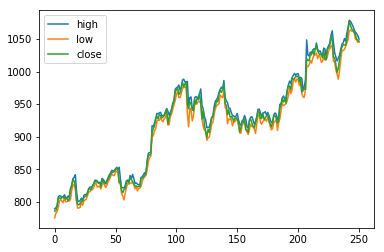

In [23]:
Hi = np.array([df.ix[:,2]])
low = np.array([df.ix[:,3]])
close = np.array([df.ix[:,4]])
plt.figure(1)
H, = plt.plot(Hi[0,:])
L, = plt.plot(low[0,:])
C, = plt.plot(close[0,:])

plt.legend([H,L,C],["high","low","close"])
plt.show()

In [25]:
x = np.concatenate([Hi,low],axis=0)
#print(x.shape)
x= np.transpose(x)
y= close
y= np.transpose(y)

In [28]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)



In [30]:
scalernew = MinMaxScaler()
scalernew.fit(y)
y = scalernew.transform(y)

In [32]:
x = np.reshape(x,(x.shape[0],1,x.shape[1]))
print(x.shape)

(251, 1, 2)


In [39]:
model = Sequential()
model.add(LSTM(100,activation='tanh', input_shape=(1,2),recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop',metrics=[metrics.mae])
model.fit(x,y,epochs=15,batch_size=1,verbose=2)
predict = model.predict(x,verbose=1)
print(predict)

Epoch 1/15
 - 1s - loss: 0.0335 - mean_absolute_error: 0.1142
Epoch 2/15
 - 1s - loss: 4.0435e-04 - mean_absolute_error: 0.0155
Epoch 3/15
 - 1s - loss: 3.5534e-04 - mean_absolute_error: 0.0149
Epoch 4/15
 - 1s - loss: 3.5031e-04 - mean_absolute_error: 0.0148
Epoch 5/15
 - 1s - loss: 3.3885e-04 - mean_absolute_error: 0.0139
Epoch 6/15
 - 1s - loss: 3.1716e-04 - mean_absolute_error: 0.0140
Epoch 7/15
 - 1s - loss: 3.0928e-04 - mean_absolute_error: 0.0134
Epoch 8/15
 - 1s - loss: 3.2453e-04 - mean_absolute_error: 0.0139
Epoch 9/15
 - 1s - loss: 3.0867e-04 - mean_absolute_error: 0.0135
Epoch 10/15
 - 1s - loss: 2.9396e-04 - mean_absolute_error: 0.0136
Epoch 11/15
 - 1s - loss: 2.8407e-04 - mean_absolute_error: 0.0130
Epoch 12/15
 - 1s - loss: 3.0533e-04 - mean_absolute_error: 0.0131
Epoch 13/15
 - 1s - loss: 3.1388e-04 - mean_absolute_error: 0.0139
Epoch 14/15
 - 1s - loss: 2.9428e-04 - mean_absolute_error: 0.0131
Epoch 15/15
 - 1s - loss: 2.9421e-04 - mean_absolute_error: 0.0135
251/251 

In [40]:
plt.figure(2)
plt.scatter(y,predict)
plt.show(block = Flase)


NameError: name 'Flase' is not defined

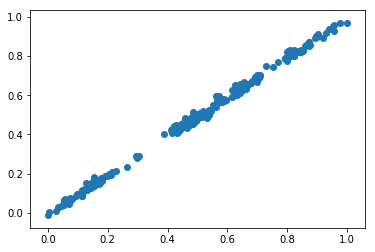

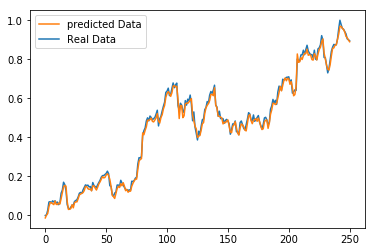

In [41]:
plt.figure(3)
test, = plt.plot(y)
predict, = plt.plot(predict)
plt.legend([predict,test],["predicted Data","Real Data"])
plt.show()